In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, lil_matrix
import matplotlib
from datetime import datetime

In [0]:
def is_edge(x,y):
  mirr_big_houses = [(138,51),(138,204),
              (261,51),(261,204)]
  big_houses = [(69,12),(69,165),
            (192,12),(192,165)]
  candles = [(69,111),(69,264),
           (138,12),(138,165),
           (192,111),(192,264),
           (261,12),(261,165)]

  for house in mirr_big_houses:
    if house[0] < x and x < house[0]+18 and house[1] < y and y < house[1]+78:
      return True
    if house[0]-12 < x and x < house[0]+1 and house[1]+60 < y and y < house[1]+78:
      return True

  for house in big_houses:
    if house[0] < x and x < house[0]+18 and house[1] < y and y < house[1]+78:
      return True
    if house[0]+17 < x and x < house[0]+29 and house[1] < y and y < house[1]+18:
      return True

  for candle in candles:
    if candle[0] < x and x < candle[0]+18 and candle[1] < y and y < candle[1]+18:
      return True

  if x > 299 or y > 299 or y == 0:
    return True
  return False

def get_schema(eps):  
  lambda1 = 1
  lambda2 = 0 
  k = 0.5
  h = 1/300
  tau = (h * h) / (4 * k)
  steps = 50000
  n = 300
    
  A = lil_matrix((n*n, n*n))
  b = np.zeros(n*n)
  x = np.zeros((n*n, 1))
  for i in range(n):
    x[n*i,0]=1
    
  u0 = 1-4*(tau*k)/(h**2)
  dx = [1, -1, 0, 0]
  dy = [0, 0, 1, -1]
  coefficients = [tau*(k/(h**2)-lambda1/(2*h)),
            tau*(k/(h**2)+lambda1/(2*h)),
            tau*(k/(h**2)-lambda2/(2*h)),
            tau*(k/(h**2)+lambda2/(2*h))]

  for i in range(0, n): 
      for e in range(0, n):
          index = i*n+e
          A[index, index] = u0
          for j in range(0, 4):
              x1 = i + dx[j]
              y1 = e + dy[j]
              if x1==0:
                  b[index] += coefficients[j]
              elif is_edge(x1,y1):
                  A[index, index] += coefficients[j]
              else:
                  A[index, x1*300+y1] = coefficients[j]

  A = csr_matrix(A)
  b = b.reshape(n*n, -1)
  for i in range(steps):
    temp = (A*x + b)
    error = np.max(np.abs(temp - x))
    if error < eps:
        print(f"{i} steps")
        break
    x = temp
  x = x.reshape((n,n))
  print(f'M = {n}')

  for i in range(n):
    for j in range(n):
      if is_edge(i, j):
        x[i][j] = -1
  return x

10e-6
36091 steps
M = 300
Elapsed time: 0:00:08.029732


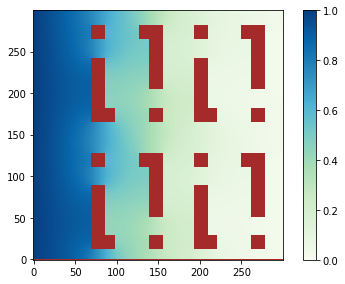

In [7]:
epsilon = float(input())
start_time = datetime.now()
result = get_schema(epsilon)
print(f'Elapsed time: {datetime.now() - start_time}')

fig, ax = plt.subplots()
current_cmap = matplotlib.cm.get_cmap("GnBu")
current_cmap.set_under('brown')
im = ax.imshow(result.T, cmap=current_cmap)
fig.gca().invert_yaxis()
fig.tight_layout()
fig.colorbar(im, ax=ax)
for im in fig.gca().get_images():
    im.set_clim(0, 1)
plt.show()

# output the values of grid

# for i in range(len(result)):
#   for j in range(len(result[0])):
#     print(f'{i} {j} {result.T[i][j]} ')
#   print('\n')